# Franco Genolet

##### Cual es el objetivo de este proyecto? 
Identificar factores claves que inciden en la decision de los clientes de continuar o desistir del servicio brindado por la compañia. Demostrar patrones que contribuyan a la fidelización de los clientes.

##### Que problema estamos intentando resolver? 
Intentaremos reducir la cantidad de suscripciones que se dan de baja.

##### Que estrategias utilizar para la retención de clientes? 
Aquellas estrategias dependerán de las variables analizadas y como se interrelacionan entre ellas. Ademas de identificar cuales son las caracteristicas que mas pesan para los clientes a la hora de tomar decisiones. 


## Data exploration

In [42]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load daataset
dataset = pd.read_csv("TelecomChurnDataSet.csv")

In [44]:
# Preview the dataset head
dataset.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [45]:
# Get the number of rows and columns
dataset.shape

(2666, 20)

In [46]:
# Look for missing values
dataset.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [47]:
# See what datatypes are in the dataset
dataset.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [48]:
# Cast the area code and churn variables to objects instead of int64 or bool
dataset = dataset.astype({'Area code':'object',
                          'Churn':'object'})

In [49]:
# Check they have changed
dataset.dtypes

State                      object
Account length              int64
Area code                  object
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                      object
dtype: object

In [50]:
# Rename the columns through dictionary
columns_new = {'State':'state', 
               'Account length':'acc_len', 
               'Area code':'area_code', 
               'International plan':'intl_plan', 
               'Voice mail plan':'vmail_plan', 
               'Number vmail messages':'num_vmail_msgs', 
               'Total day minutes':'day_min', 
               'Total day calls':'day_calls',
               'Total day charge':'day_charge', 
               'Total eve minutes':'eve_min', 
               'Total eve calls':'eve_calls',
               'Total eve charge':'eve_charge',
               'Total night minutes':'night_min',
               'Total night calls':'night_calls',
               'Total night charge':'night_charge',
               'Total intl minutes':'intl_min',
               'Total intl calls':'intl_calls',
               'Total intl charge':'intl_charge',
               'Customer service calls':'cs_calls',
               'Churn':'churn'
               }
dataset.rename(columns=columns_new,inplace=True)
dataset.head()

,state,acc_len,area_code,intl_plan,vmail_plan,num_vmail_msgs,day_min,day_calls,day_charge,eve_min,eve_calls,eve_charge,night_min,night_calls,night_charge,intl_min,intl_calls,intl_charge,cs_calls,churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [51]:
# split dataset into two, one that contains the numerical features 
# and another one that contains categorical ones
cat_features = dataset.select_dtypes(include=['object']).columns.tolist()
num_features = dataset.select_dtypes(include=['int64','float64']).columns.tolist()

# Display them
print(cat_features)
print('\n\n')
print(num_features)

['state', 'area_code', 'intl_plan', 'vmail_plan', 'churn']



['acc_len', 'num_vmail_msgs', 'day_min', 'day_calls', 'day_charge', 'eve_min', 'eve_calls', 'eve_charge', 'night_min', 'night_calls', 'night_charge', 'intl_min', 'intl_calls', 'intl_charge', 'cs_calls']


# Exploratory Data Analysis

## Plot relationship between day_min, day_call, day_charge

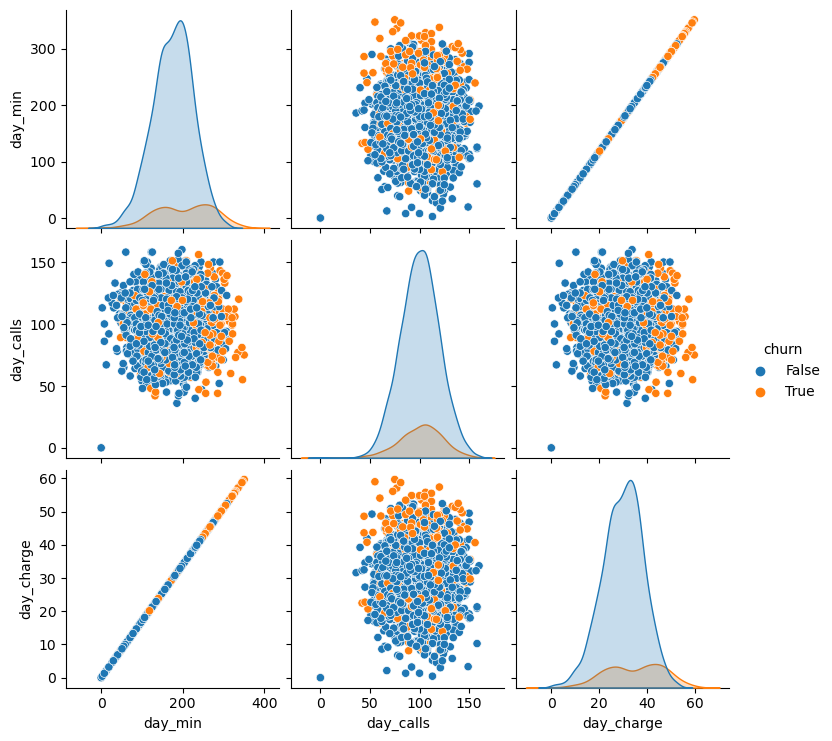

In [52]:
ax = sns.pairplot(dataset[['day_min','day_calls','day_charge','churn']],hue='churn')

### Conclusiones

**1-** Las variables day_min y day_charge en el conjunto de datos parecen tener una fuerte correlación positiva, lo que significa que a medida que aumentan los valores de una variable, la otra tambien lo hace. Esto puede indicar que estas variables miden información similar o relacionada y potencialmente podrían usarse juntas en el análisis o modelado.

**2-** No parece haber una relación significativa entre las variables day_calls y day_charge. Esto sugiere que la cantidad de llamadas realizadas durante el día no tiene un impacto importante en la variable day_charge.

**3-** El análisis sugiere que existe una relación positiva entre day_charge/day_min y la tasa de abandono. Esto significa que a medida que aumenta el day_charge/day_min, también aumenta la probabilidad de que un cliente abandone.

**4-** Se han identificado algunos valores atípicos en los datos que pueden requerir un análisis más detallado. Estos valores atípicos podrían tener un impacto significativo en los resultados y deben investigarse para comprender su impacto en el análisis y el modelado.


# Data Pre-Processing

In [53]:
# encode intl_plan column
dataset['intl_plan'].replace(to_replace={'Yes':1,'No':0},inplace=True)
dataset.head()

,state,acc_len,area_code,intl_plan,vmail_plan,num_vmail_msgs,day_min,day_calls,day_charge,eve_min,eve_calls,eve_charge,night_min,night_calls,night_charge,intl_min,intl_calls,intl_charge,cs_calls,churn
0,KS,128,415,0,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [54]:
# encode vmail_plan column
dataset['vmail_plan'].replace(to_replace={'Yes':1,'No':0},inplace=True)
dataset.head()

,state,acc_len,area_code,intl_plan,vmail_plan,num_vmail_msgs,day_min,day_calls,day_charge,eve_min,eve_calls,eve_charge,night_min,night_calls,night_charge,intl_min,intl_calls,intl_charge,cs_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
# encode vmail_plan column
dataset['churn'].replace(to_replace={True:1,False:0},inplace=True)
dataset.head()

,state,acc_len,area_code,intl_plan,vmail_plan,num_vmail_msgs,day_min,day_calls,day_charge,eve_min,eve_calls,eve_charge,night_min,night_calls,night_charge,intl_min,intl_calls,intl_charge,cs_calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [56]:
# delete the 'state' column as it is irrelevant to the ML model
dataset.drop('state', axis=1, inplace=True)
dataset.head()

,acc_len,area_code,intl_plan,vmail_plan,num_vmail_msgs,day_min,day_calls,day_charge,eve_min,eve_calls,eve_charge,night_min,night_calls,night_charge,intl_min,intl_calls,intl_charge,cs_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [57]:
X = dataset.drop('churn', axis=1, inplace=False).copy()
y = dataset['churn'].replace(to_replace={'True':1,'False':0},inplace=False)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: churn, Length: 2666, dtype: int64


In [58]:
# Feature selection with a random forest classifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = dataset.drop('churn', axis=1, inplace=False).copy()
y = dataset['churn']

# Create a random forest classifier object and use it to select features
rf = RandomForestClassifier(n_estimators=100)
selector = SelectFromModel(rf)
selector.fit(X, y)

# Get the Boolean mask of selected features
mask = selector.get_support()

# Get the names of the selected features
selected_features = X.columns[mask]

# Print the selected features
print(selected_features)


Index(['intl_plan', 'day_min', 'day_charge', 'eve_min', 'eve_charge',
       'intl_calls', 'cs_calls'],
      dtype='object')


In [59]:
# Create new dataset
new_dataset = dataset[['intl_plan', 'day_min', 'day_charge', 'eve_min', 'eve_charge', 'cs_calls', 'churn']]
new_dataset

,intl_plan,day_min,day_charge,eve_min,eve_charge,cs_calls,churn
0,0,265.1,45.07,197.4,16.78,1,0
1,0,161.6,27.47,195.5,16.62,1,0
2,0,243.4,41.38,121.2,10.30,0,0
3,1,299.4,50.90,61.9,5.26,2,0
4,1,166.7,28.34,148.3,12.61,3,0
...,...,...,...,...,...,...,...
2661,0,134.7,22.90,189.7,16.12,2,0
2662,0,156.2,26.55,215.5,18.32,2,0
2663,0,231.1,39.29,153.4,13.04,3,0
2664,0,180.8,30.74,288.8,24.55,2,0


In [60]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(new_dataset.iloc[:,0:-1],
                                                 new_dataset.iloc[:,-1],
                                                 test_size = 0.20,
                                                 random_state = 111,
                                                 stratify = new_dataset.iloc[:,-1])

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler().fit(train_X)

In [63]:
#Scaling the Training set
dataset_scaled_train = pd.DataFrame(scaler.transform(train_X),columns = train_X.columns.tolist())

In [64]:
dataset_scaled_train.head()

,intl_plan,day_min,day_charge,eve_min,eve_charge,cs_calls
0,0.0,0.559008,0.559021,0.510036,0.510191,0.222222
1,0.0,0.408495,0.408451,0.634314,0.634423,0.444444
2,0.0,0.246579,0.246647,0.784163,0.784212,0.222222
3,0.0,0.554732,0.554661,0.640088,0.640246,0.333333
4,0.0,0.252281,0.252347,0.491614,0.491750,0.222222


In [65]:
dataset_scaled_train['churn'] = train_Y.values

In [66]:
dataset_scaled_train.head()

,intl_plan,day_min,day_charge,eve_min,eve_charge,cs_calls,churn
0,0.0,0.559008,0.559021,0.510036,0.510191,0.222222,0
1,0.0,0.408495,0.408451,0.634314,0.634423,0.444444,1
2,0.0,0.246579,0.246647,0.784163,0.784212,0.222222,0
3,0.0,0.554732,0.554661,0.640088,0.640246,0.333333,0
4,0.0,0.252281,0.252347,0.491614,0.491750,0.222222,0


In [67]:
dataset_scaled_test = pd.DataFrame(scaler.transform(test_X),columns = test_X.columns.tolist())

In [68]:
dataset_scaled_test['churn'] = test_Y.values

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca_obj = PCA()
pca_obj = pca_obj.fit(dataset_scaled_train.iloc[:,0:-1])

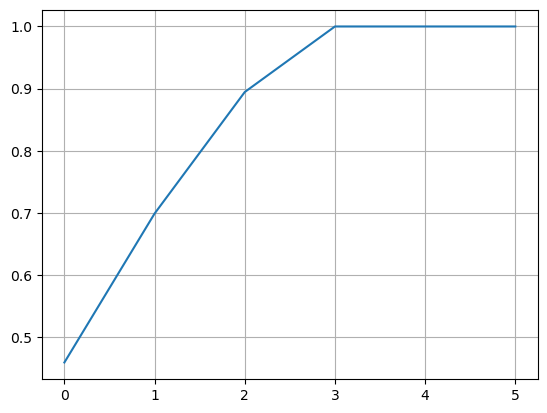

In [71]:
plt.plot(np.cumsum(pca_obj.explained_variance_ratio_))
plt.grid(axis='both')

In [72]:
pca_obj = PCA(n_components=3)

In [73]:
pca_obj = pca_obj.fit(dataset_scaled_train.iloc[:,0:-1])

In [74]:
col_names = np.arange(1,4).tolist()

In [75]:
pca_train = pd.DataFrame(pca_obj.transform(dataset_scaled_train.iloc[:,0:-1]),columns=col_names)

In [76]:
pca_train.head()

,1,2,3
0,-0.100211,-0.069950,0.060429
1,-0.112645,0.139839,-0.122767
2,-0.115983,0.357531,-0.342542
3,-0.099446,-0.068505,-0.123599
4,-0.123204,0.363774,0.071092


In [77]:
pca_train['label'] = dataset_scaled_train.iloc[:,-1]
pca_train.head()

,1,2,3,label
0,-0.100211,-0.069950,0.060429,0
1,-0.112645,0.139839,-0.122767,1
2,-0.115983,0.357531,-0.342542,0
3,-0.099446,-0.068505,-0.123599,0
4,-0.123204,0.363774,0.071092,0


In [78]:
pca_test = pd.DataFrame(pca_obj.transform(dataset_scaled_test.iloc[:,0:-1]),columns=col_names)
pca_test['label'] = dataset_scaled_test.iloc[:,-1]
pca_test.head()

,1,2,3,label
0,0.881006,0.252614,0.115044,0
1,-0.128832,0.392636,0.451301,0
2,-0.095765,-0.001935,-0.287541,0
3,0.895451,0.183926,-0.267851,0
4,-0.100447,0.040584,-0.140791,0


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [81]:
performance_metrics = pd.DataFrame(columns=["Model","Accuracy","Recall","Precision"])

In [82]:
def classifier_training_testing(clf,clf_name,train_X,train_Y,test_X,test_Y):
    clf.fit(train_X,train_Y)
    predictions = clf.predict(test_X)
    accuracy = accuracy_score(test_Y,predictions)
    conf_matrix = confusion_matrix(test_Y,predictions)
    recall = recall_score(test_Y,predictions)
    precision = precision_score(test_Y,predictions)


    df_performance = pd.DataFrame({"Model":[clf_name],
                                 "Accuracy":[accuracy],
                                 "Recall" : [recall],
                                 "Precision": [precision]
                                 })
  
    return df_performance

# Logistic Regression

In [91]:
clf_logit = LogisticRegression(solver='liblinear')
logit_performance = classifier_training_testing(clf_logit,
                            "Logistic Regression",
                            pca_train.iloc[:,0:-1],
                            pca_train.iloc[:,-1],
                            pca_test.iloc[:,0:-1],
                            pca_test.iloc[:,-1])
performance_metrics = performance_metrics.append(logit_performance)
performance_metrics.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_23588\3560571563.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_metrics = performance_metrics.append(logit_performance)


,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.863296,0.153846,0.631579
0,Decision Tree,0.863296,0.410256,0.542373
0,Random Forest,0.872659,0.358974,0.608696
0,SVM,0.872659,0.217949,0.708333
0,Logistic Regression,0.863296,0.153846,0.631579


# Decision Tree

In [92]:
clf_dt = DecisionTreeClassifier(criterion='gini')
dt_performance = classifier_training_testing(clf_dt,
                            "Decision Tree",
                            pca_train.iloc[:,0:-1],
                            pca_train.iloc[:,-1],
                            pca_test.iloc[:,0:-1],
                            pca_test.iloc[:,-1])
performance_metrics = performance_metrics.append(dt_performance)
performance_metrics.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_23588\629932470.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_metrics = performance_metrics.append(dt_performance)


,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.863296,0.153846,0.631579
0,Decision Tree,0.863296,0.410256,0.542373
0,Random Forest,0.872659,0.358974,0.608696
0,SVM,0.872659,0.217949,0.708333
0,Logistic Regression,0.863296,0.153846,0.631579


In [93]:
clf_RF = RandomForestClassifier(bootstrap=True)
RF_performance = classifier_training_testing(clf_RF,
                            "Random Forest",
                            pca_train.iloc[:,0:-1],
                            pca_train.iloc[:,-1],
                            pca_test.iloc[:,0:-1],
                            pca_test.iloc[:,-1])
performance_metrics = performance_metrics.append(RF_performance)
performance_metrics.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_23588\944765801.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_metrics = performance_metrics.append(RF_performance)


,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.863296,0.153846,0.631579
0,Decision Tree,0.863296,0.410256,0.542373
0,Random Forest,0.872659,0.358974,0.608696
0,SVM,0.872659,0.217949,0.708333
0,Logistic Regression,0.863296,0.153846,0.631579


In [94]:
clf_SVM = SVC(probability=True)
SVM_performance = classifier_training_testing(clf_SVM,
                            "SVM",
                            pca_train.iloc[:,0:-1],
                            pca_train.iloc[:,-1],
                            pca_test.iloc[:,0:-1],
                            pca_test.iloc[:,-1])
performance_metrics = performance_metrics.append(SVM_performance)
performance_metrics.head()

C:\Users\franc\AppData\Local\Temp\ipykernel_23588\2234600672.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_metrics = performance_metrics.append(SVM_performance)


,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.863296,0.153846,0.631579
0,Decision Tree,0.863296,0.410256,0.542373
0,Random Forest,0.872659,0.358974,0.608696
0,SVM,0.872659,0.217949,0.708333
0,Logistic Regression,0.863296,0.153846,0.631579


### SVM

### Conclusion

Segun el estadistico utilizado segun cada analista. Si nos guiamos por Accuracy, el modelo que mas se adapta a los datos es "Random Forest" obteniendo un poco mas del 88%.